## 0. Environment Initialization  
### 0.1. Import Main Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')
sns.set(font_scale=1)

### 0.2. Check: Operating System

In [2]:
import platform
system = platform.system()
print(system)

Windows


### 0.3. Korean Font Setting

In [3]:
# -*- coding: UTF-8 -*-
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [4]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

if system == 'Windows':
  datapath = os.getcwd() + '\\'
  imagepath = datapath + 'images\\'
  
  # ttf 폰트 전체개수
  print(len(font_list))
  font_list[:10]

  f = [f.name for f in fm.fontManager.ttflist]
  print(len(font_list))
  f[:10]

  [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

  path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
  font_name = fm.FontProperties(fname=path, size=50).get_name()

  print(font_name)
  plt.rc('font', family=font_name)
  
elif system == 'Linux':
  datapath = os.getcwd() + '//'
  imagepath = datapath + 'images//'
  
  !apt-get update -qq
  !apt-get install fonts-nanum* -qq

  path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
  font_name = fm.FontProperties(fname=path, size=10).get_name()

  print(font_name)
  plt.rc('font', family=font_name)

  fm._rebuild()
  mpl.rcParams['axes.unicode_minus'] = False
  
else:
  print('# Sorry, my code has compatibility with Windows and Linux only.')
  exit(0)

버전:  3.1.1
설치 위치:  C:\Users\sec\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\sec\.matplotlib
캐시 위치:  C:\Users\sec\.matplotlib
설정 파일 위치:  C:\Users\sec\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
868
868
NanumBarunGothic


### 0.4. Figure Style Setting

* 기본 seaborn style : 'whitegrid'
* 기본 color palette : 'muted'
* 기본 가시성 : 'talk'

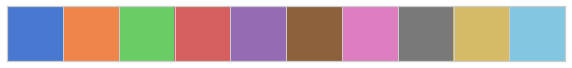

In [5]:
# Figure style setting
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('muted'))
sns.set_context("talk")
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

### 0.5. DataFrame to Markdown

In [6]:
from IPython.display import Markdown, display

def df2md(df):    
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))

## 1. Data Import 


### 1.1. Read Excel File and Take a glance

In [7]:
data_raw = pd.read_excel(datapath + '190530_daejeon.xlsx')
df2md(data_raw.head())

gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
참조용코드|건물위치구분|건물위치구분한글|건물유형코드|아파트유무|층수|시군구코드|시군구명|읍면동코드|읍면동명|직각좌표_x|직각좌표_y|경도|위도|건물 넓이|표고|음영반영 월간/년간 일사량|||||||||||||음영미반영 위성일사량||||||||||||
24300|0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
16295|0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969
24341|0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
24345|0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281


## 2. Brief Data Review


### 2.1. 이중 column name 정리

* 한글 Column name을 별도 list로 분리해서 관리


In [8]:
data_dsc = data_raw.iloc[0,:].tolist()
print(data_dsc)

data = data_raw.drop(0, axis=0).reset_index(drop=True)

['참조용코드', '건물위치구분', '건물위치구분한글', '건물유형코드', '아파트유무', '층수', '시군구코드', '시군구명', '읍면동코드', '읍면동명', '직각좌표_x', '직각좌표_y', '경도', '위도', '건물 넓이', '표고', '음영반영 월간/년간 일사량', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '음영미반영 위성일사량', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


### 2.2. column 제거 함수

* column 제거시 column name list에서도 함께 삭제

In [9]:
def rm_col(df, names):
  for name in names:
    idx = data_dsc.index(name)
    rm_col_name = df.columns[idx]
    print('Remove: ', data_dsc[idx], rm_col_name)
    data_dsc.pop(idx)
    df = df.drop(rm_col_name, axis=1)
    
  return df

* 무의미 코드 데이터 삭제

In [10]:
data = rm_col(data, ['참조용코드'])

Remove:  참조용코드 gid


* 컬럼별 데이터 타입 확인 : 부적절하게 입력된 데이터는 형변환 실시


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147754 entries, 0 to 147753
Data columns (total 41 columns):
buld_se_cd    147754 non-null object
buld_se_nm    147754 non-null object
bdtyp_cd      147754 non-null object
apt_yn        147754 non-null object
gro_flo_co    147754 non-null object
sig_cd        147754 non-null object
sig_nm        147754 non-null object
emd_cd        147754 non-null object
emd_nm        147754 non-null object
tm_x          147754 non-null object
tm_y          147754 non-null object
lon           147754 non-null object
lat           147754 non-null object
buld_area     147754 non-null object
buld_elev     147754 non-null object
m01           147754 non-null object
m02           147754 non-null float64
m03           147754 non-null float64
m04           147754 non-null float64
m05           147754 non-null float64
m06           147754 non-null float64
m07           147754 non-null float64
m08           147754 non-null float64
m09           147754 non-null f

* 데이터 형변환 : 지상 층수, 건물 좌표, 넓이, 표고


In [12]:
data['gro_flo_co'] = data['gro_flo_co'].astype(int)
data['tm_x'] = data['tm_x'].astype(float)
data['tm_y'] = data['tm_y'].astype(float)
data['lon'] = data['lon'].astype(float)
data['lat'] = data['lat'].astype(float)
data['buld_area'] = data['buld_area'].astype(float)
data['buld_elev'] = data['buld_elev'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147754 entries, 0 to 147753
Data columns (total 41 columns):
buld_se_cd    147754 non-null object
buld_se_nm    147754 non-null object
bdtyp_cd      147754 non-null object
apt_yn        147754 non-null object
gro_flo_co    147754 non-null int32
sig_cd        147754 non-null object
sig_nm        147754 non-null object
emd_cd        147754 non-null object
emd_nm        147754 non-null object
tm_x          147754 non-null float64
tm_y          147754 non-null float64
lon           147754 non-null float64
lat           147754 non-null float64
buld_area     147754 non-null float64
buld_elev     147754 non-null float64
m01           147754 non-null object
m02           147754 non-null float64
m03           147754 non-null float64
m04           147754 non-null float64
m05           147754 non-null float64
m06           147754 non-null float64
m07           147754 non-null float64
m08           147754 non-null float64
m09           147754 non-n

### 2.2 Data Visualization


#### 2.2.1. 연평균 Data

* 일차적으로 연평균 데이터 vs 독립변수 비교분석 : 시간(월)에 의한 영향력 배제
* [음영 손실] 데이터 추가 : [음영 제외 위성일사량] - [음영 반영 일사량]
* 시각화를 위한 DataFrame 별도 확보 : data_vis

In [13]:
for i in range(1, 13):
  month = str(i).zfill(2)
  new_col_name = 'sh_m' + month # shadow column
  data[new_col_name] = data['st_m'+month] - data['m'+month]

data['sh_y17'] = data['st_y17'] - data['y17']

import copy

data_vis = copy.deepcopy(data)
df2md(data_vis.head())

buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17|sh_m01|sh_m02|sh_m03|sh_m04|sh_m05|sh_m06|sh_m07|sh_m08|sh_m09|sh_m10|sh_m11|sh_m12|sh_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80.0|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|15.853430963479596|21.196602555421705|28.08449523265601|29.454629072775987|27.844646582237004|22.549515485764005|15.192461288892602|22.770487913718995|26.17877515462699|19.556294620037093|17.146092185607408|15.1843897012564|261.01187588617995
0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71.0|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969|22.940889107553602|22.3993587870347|26.430216312407993|28.369146347045984|31.960952156469006|29.491547634727|20.76904748615459|25.02040416316001|25.185336414136017|20.412861133876604|20.199319902219308|24.0076456446397|297.1867230063999
0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77.0|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|15.137385948844596|19.525925180186405|26.067230722179005|29.603121384329995|31.07796030459201|26.508459091187007|17.040827460911302|23.99357961571799|24.757080700085993|18.046226294144304|15.833817191746007|14.6704678535462|262.2621320641499
0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78.0|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|28.760889044514393|36.9228310673326|49.98766962687222|54.79049675552899|57.281566690516016|49.259573689213994|33.9200926180242|45.50116132806889|47.58644870475469|35.2625743724682|30.390020935623802|27.319446943424396|496.982828776039
0|지상|18999|N|1|30110|동구|30110137|대별동|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80.0|67.2504756116031|84.0601618833709|119.429690775118|141.218664905481|162.556833049707|146.167080444202|99.8334377941332|124.410167208889|117.419092797396|83.4298420412499|69.2576492167356|62.8880742809229|1277.92121626201|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|10.1909535265805|13.504573529226803|17.027218404570007|18.635155895299988|18.589285114356016|15.363681274547986|9.478253490046797|14.520878323337982|15.835591650845984|12.1847362058204|11.134577956116004|10.087626097495097|166.55253862080008


##### 2.2.1.1. 단변수 분석


###### 2.2.1.1.1. Categorical Data

* class 분포 분석: 건물 위치, 건물 용도, 아파트 여부, 지상 층수, 행정구역(구, 동)

In [14]:
xs = {
    'buld_se_nm': '건물 위치',
    'bdtyp_cd' : '건물 용도',
    'apt_yn': '아파트 여부',
    'gro_flo_co': '지상 층수',
    'sig_nm': '행정구역(구)',
    'emd_nm': '행정구역(동)',
}

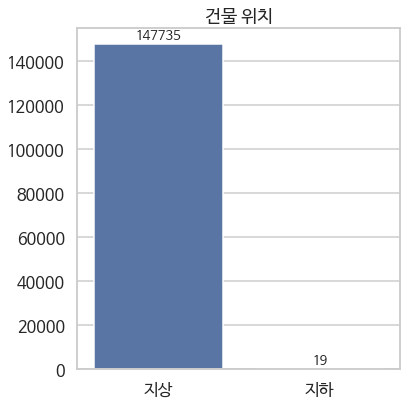

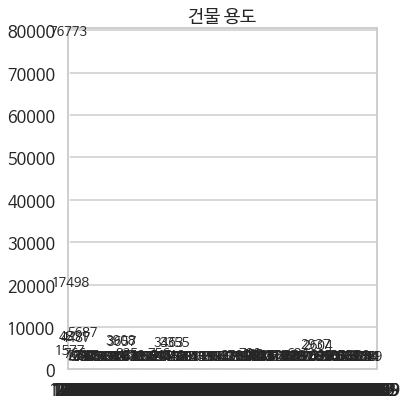

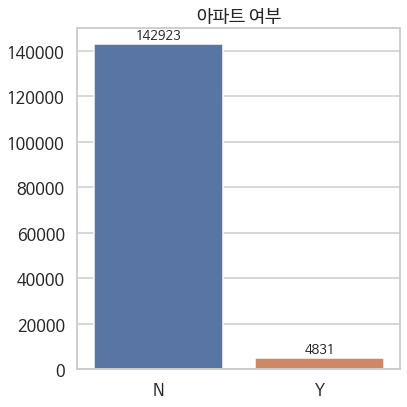

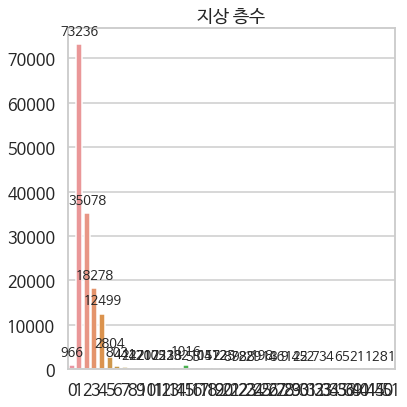

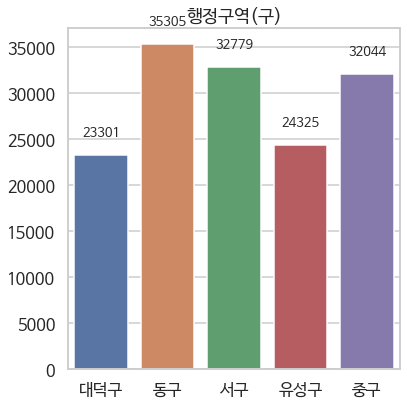

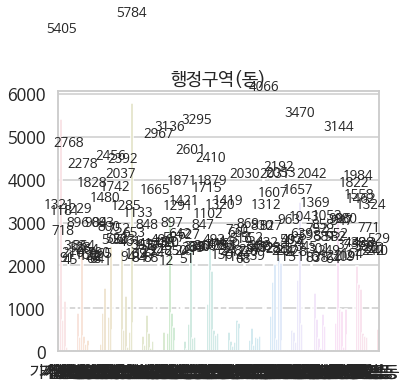

In [15]:
# bar chart

for xk, xv in xs.items():
  grouped = pd.DataFrame(data_vis.groupby(xk).count().reset_index())
  
  plt.figure(figsize=(6,6))
  ax = sns.barplot(x=xk, y='y17', data=grouped)
  ax.set(title=xv)
  ax.set(xlabel=None)
  ax.set(ylabel=None)
  for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2, i.get_height()+2000, str(int(i.get_height())), ha='center', fontsize=13)

  plt.tight_layout()
  plt.savefig(imagepath+'distrib_{}.png'.format(xv))

###### 2.2.1.1.2. Numerical Data

* class 분포 분석: 지상 층수, 건물 좌표, 건물 넓이, 건물 표고, 음영 (미)반영 일사량, 일사량 손실

In [16]:
xs = {
    'gro_flo_co' : '지상 층수',
    'tm_x' : '건물 x좌표',
    'tm_y' : '건물 y좌표',
    'buld_area' : '건물 넓이',
    'buld_elev' : '건물 표고',
    'y17' : '음영반영 일사량',
    'st_y17': '음영 제외 위성일사량',
    'sh_y17': '음영 기인 일사량 손실'
}

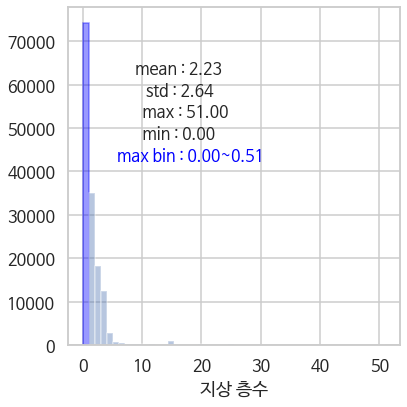

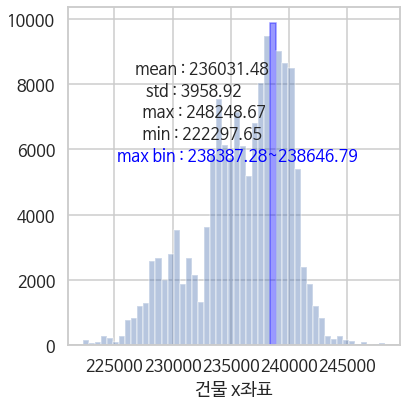

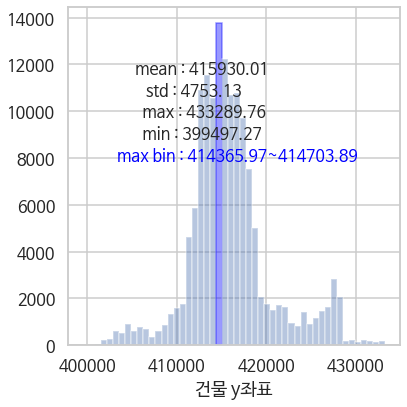

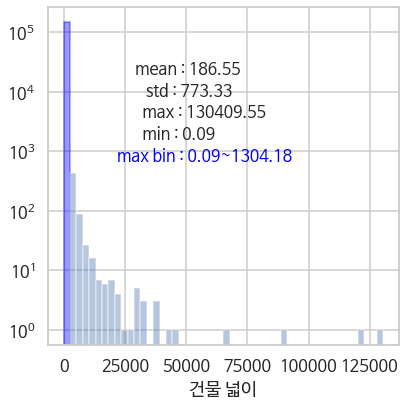

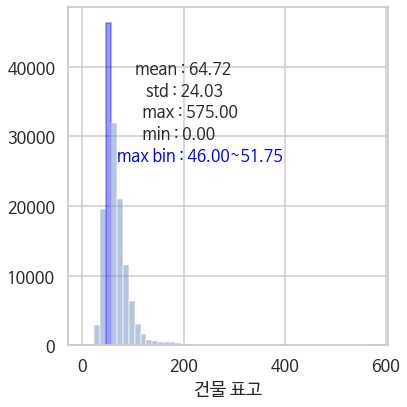

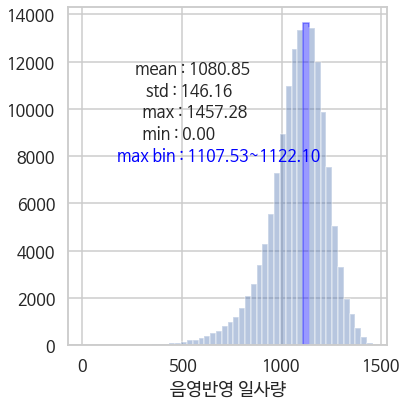

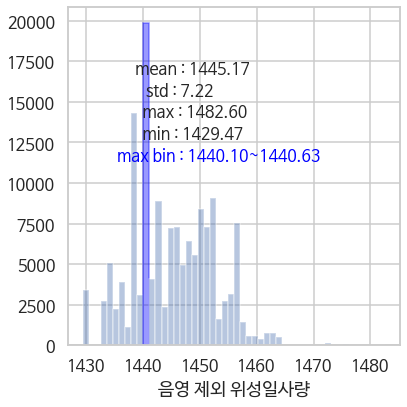

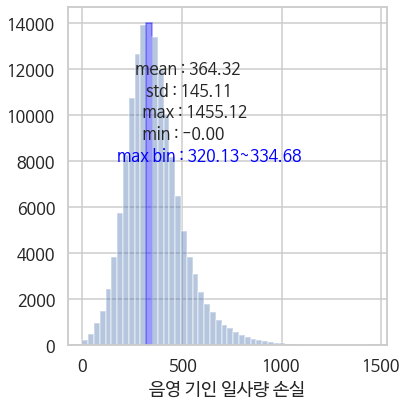

In [17]:
for xk, xv in xs.items():

  fig, ax = plt.subplots(figsize=(6,6))
  f = sns.distplot(data_vis[xk], kde=False, rug=False)
  
  if xv == '건물 넓이':
    f.set(yscale='log')
  
  mean_val = data_vis[xk].mean()
  std_val = data_vis[xk].std()
  max_val = data_vis[xk].max()
  min_val = data_vis[xk].min()
  
  fig.text(0.3,0.8, '     mean : {:>3.02f}'.format(mean_val), fontsize=16)
  fig.text(0.3,0.75, '        std : {:>3.02f}'.format(std_val), fontsize=16)
  fig.text(0.3,0.7, '       max : {:>3.02f}'.format(max_val), fontsize=16)
  fig.text(0.3,0.65, '       min : {:>3.02f}'.format(min_val), fontsize=16)
  
  # The most frequent bin
  heights = [h.get_height() for h in f.patches]
  index_max = np.argmax(heights)
  max_x = f.patches[index_max].get_x() + np.array([0, f.patches[index_max].get_width()/2])
  fig.text(0.3,0.6, 'max bin : {:>.02f}~{:>.02f}'.format(max_x[0], max_x[1]), fontsize=16, color='blue')
  f.patches[index_max].set_color('blue')
  
  f.set(xlabel=xv)
  plt.tight_layout()
  f.figure.savefig(imagepath + 'distrib_{}.png'.format(xv))

##### 2.2.1.2. 데이터 공간 분포 분석

In [18]:
# 특정 데이터의 지도상 분포 시각화 함수

def vis_map(df: pd.DataFrame, 
            xy: list, #[x, y]
            col: str,
            pal: sns.color_palette, 
            title: str, 
            bintup=None,   # bintup = (binmin: int, binmax: int, binnum: int)
            log=False
           ):
  
  if df[col].dtype == 'float' or df[col].dtype == 'int':
    binmin, binmax, binnum = bintup
    
    if log==True:
      log_binmin = np.log10(binmin)
      log_binmax = np.log10(binmax)
      colbin = np.logspace(log_binmin, log_binmax, num=binnum)
    else:
      colbin = np.arange(binmin, binmax, binnum)
      
    colbin_len = len(colbin) - 1 
   
    colbin_name = col + '_bin'
    df[colbin_name] = pd.cut(df[col], colbin)
    
  else:
    colbin = df[col].unique()
    colbin_len = len(df[col].unique())
    colbin_name = col

  g = sns.relplot(kind='scatter', x=xy[0], y=xy[1], data=df, 
                  s=3, linewidth=0, hue=colbin_name, 
                  palette=sns.color_palette(pal, n_colors=colbin_len), 
                  legend='brief',
                  height=10)
  
  if xy == ['lon', 'lat']:
    plt.xlabel('건물 x 좌표 (경도)')
    plt.ylabel('건물 y 좌표 (위도)')
  elif xy == ['tm_x', 'tm_y']:
    plt.xlabel('건물 x 좌표 (m)')
    plt.ylabel('건물 y 좌표 (m)')
    
  g.set(aspect=1)
  g.set(title=title)
  plt.savefig(imagepath + 'map_' + title + '.png')

  # 해당 데이터가 높은/낮은 행정구역(동) : Numerical Data only
  if df[col].dtype == 'float' or df[col].dtype == 'int':
    data_tmp = df.groupby(by=['emd_nm'], as_index=True).mean()

    tmp_top = pd.DataFrame(data_tmp.sort_values(by=col, ascending=False)[col].head(10)).reset_index().rename(index=str, columns={"emd_nm":"emd_t10", col: col+"_t10"})
    tmp_btm = pd.DataFrame(data_tmp.sort_values(by=col, ascending=True)[col].head(10)).reset_index().rename(index=str, columns={"emd_nm":"emd_b10", col: col+"_b10"})

    df2md(pd.concat([tmp_top, tmp_btm], axis=1))


emd_t10|buld_elev_t10|emd_b10|buld_elev_b10
---|---|---|---
장척동|200.8205134073893|문평동|29.6309677298351
하소동|187.30655462868742|목상동|33.34714626065261
소호동|186.24666666666667|신일동|34.16302328701167
어남동|183.9269063386986|송강동|36.309575061960196
상소동|173.72322226630317|봉산동|37.84697819944483
세동|156.60432709867533|용산동|38.64708332220713
비룡동|152.43468842565767|석봉동|38.86642466958768
장안동|151.7356809444998|관평동|39.47508926476751
구완동|148.43764720243567|덕암동|40.181665337410415
금동|144.63389458907278|만년동|40.51432912319521


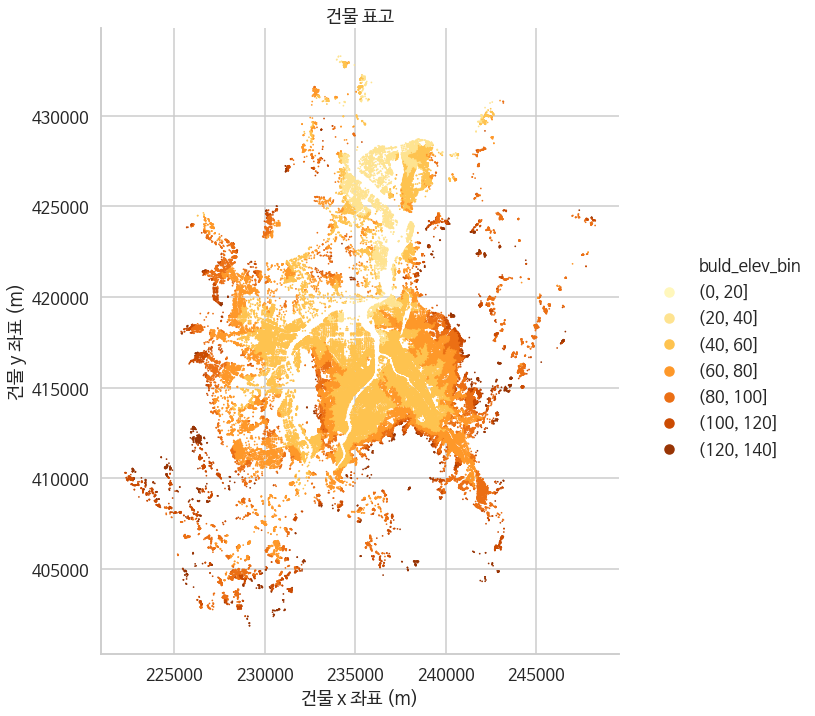

In [19]:
# 건물 표고

vis_map(df=data_vis, xy=['tm_x', 'tm_y'], col='buld_elev', pal='YlOrBr', title='건물 표고', 
            bintup=(0, 160, 20))

In [21]:
import shutil
shutil.copy2(imagepath+'map_건물 표고.png', imagepath+'map_건물 표고_m.png')

'C:\\Users\\sec\\SynologyDrive\\KIER_ArbeitPlatz\\12_EnergyForecast\\03_태양광_음영\\NGL\\190605_EDA\\190611_EDA\\images\\map_건물 표고_m.png'

emd_t10|buld_elev_t10|emd_b10|buld_elev_b10
---|---|---|---
장척동|200.8205134073893|문평동|29.6309677298351
하소동|187.30655462868742|목상동|33.34714626065261
소호동|186.24666666666667|신일동|34.16302328701167
어남동|183.9269063386986|송강동|36.309575061960196
상소동|173.72322226630317|봉산동|37.84697819944483
세동|156.60432709867533|용산동|38.64708332220713
비룡동|152.43468842565767|석봉동|38.86642466958768
장안동|151.7356809444998|관평동|39.47508926476751
구완동|148.43764720243567|덕암동|40.181665337410415
금동|144.63389458907278|만년동|40.51432912319521


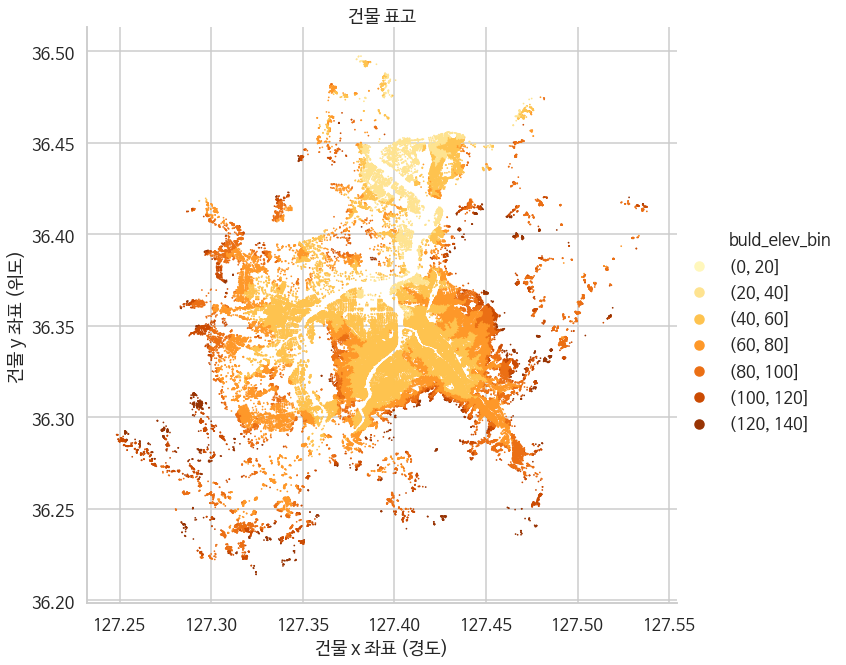

In [23]:
# 건물 표고

vis_map(df=data_vis, xy=['lon', 'lat'], col='buld_elev', pal='YlOrBr', title='건물 표고', 
            bintup=(0, 160, 20))

In [24]:
shutil.copy2(imagepath+'map_건물 표고.png', imagepath+'map_건물 표고_polar.png')

'C:\\Users\\sec\\SynologyDrive\\KIER_ArbeitPlatz\\12_EnergyForecast\\03_태양광_음영\\NGL\\190605_EDA\\190611_EDA\\images\\map_건물 표고_polar.png'